In [1]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


In [2]:
df = pd.read_csv("Invistico_Airline.csv")

In [3]:
df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [4]:
df.tail()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0
129879,dissatisfied,Female,disloyal Customer,38,Personal Travel,Eco,4307,3,4,3,...,3,4,5,5,5,3,3,3,185,186.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [6]:
pd.isnull(df).sum()

satisfaction                           0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

<Axes: >

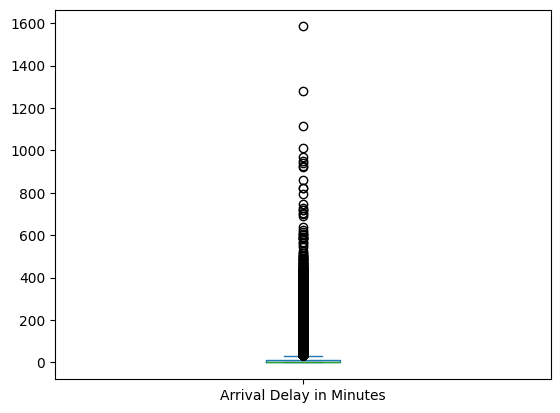

In [7]:
df["Arrival Delay in Minutes"].plot.box()

In [8]:
df.shape

(129880, 23)

In [10]:
df.shape

(129487, 23)

In [11]:
df.describe()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
count,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000,129487.000000
mean,39.428761,1981.008974,2.838586,2.990277,2.852024,2.990377,3.249160,3.383745,3.519967,3.472171,3.465143,3.486118,3.695460,3.340729,3.705886,3.352545,14.643385,15.091129
std,15.117597,1026.884131,1.392873,1.527183,1.443587,1.305917,1.318765,1.345959,1.306326,1.305573,1.270755,1.292079,1.156487,1.260561,1.151683,1.298624,37.932867,38.465650
min,7.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,1359.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,1924.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,0.000000
75%,51.000000,2543.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,6951.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


# Satisfaction

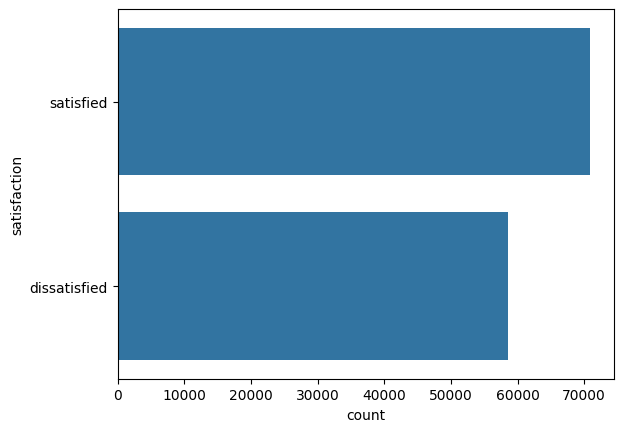

In [12]:
sns.countplot(df["satisfaction"])
plt.show()

In [13]:
df["satisfaction"].value_counts()

satisfaction
satisfied       70882
dissatisfied    58605
Name: count, dtype: int64

### From above graph we varify that the satisfied customer is more than dissatisfied customer.

# Gender

<Axes: xlabel='count', ylabel='Gender'>

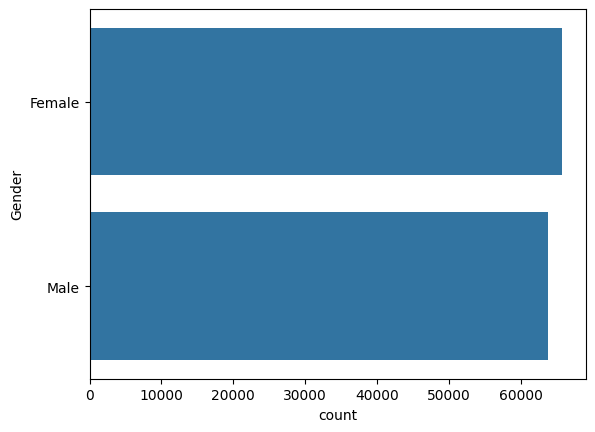

In [14]:
sns.countplot(df["Gender"])

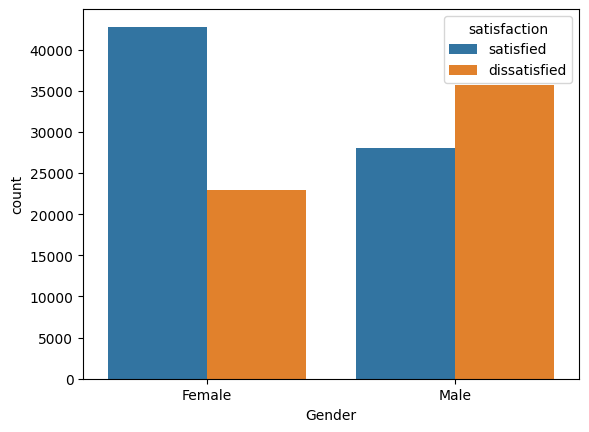

In [15]:
sns.countplot(df,x="Gender",hue="satisfaction")
plt.show()

### Here , In satisfied,number of Female Customer is more than Number of Male Customer And In dissatisfied,number of Male Customer is more than Number of female Customer.

# Age

<Axes: xlabel='Age', ylabel='Count'>

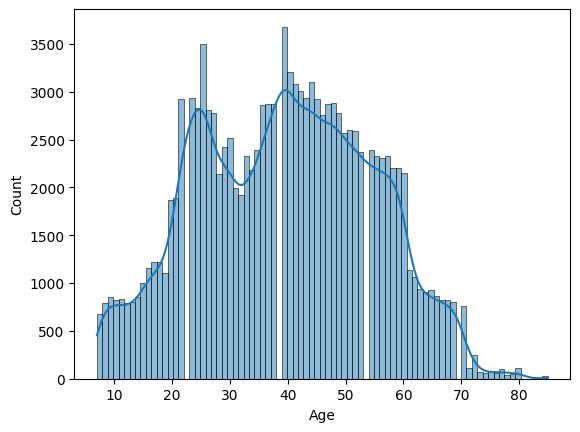

In [16]:
sns.histplot(df["Age"],kde=True)

<Axes: >

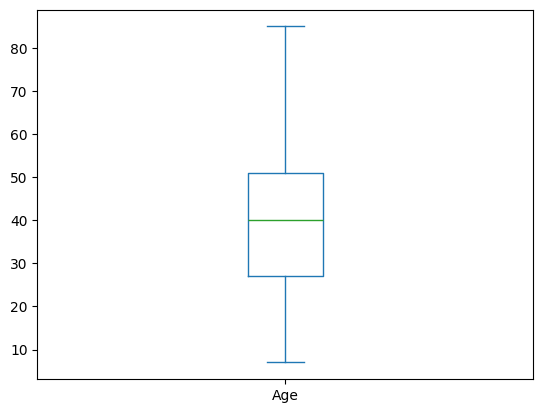

In [17]:
df["Age"].plot.box()

There is no Outliers in "Age" and it is slightly Normally Distributed

# Types of Travel

In [18]:
df["Type of Travel"].info()

<class 'pandas.core.series.Series'>
Index: 129487 entries, 0 to 129879
Series name: Type of Travel
Non-Null Count   Dtype 
--------------   ----- 
129487 non-null  object
dtypes: object(1)
memory usage: 2.0+ MB


<Axes: xlabel='count', ylabel='Type of Travel'>

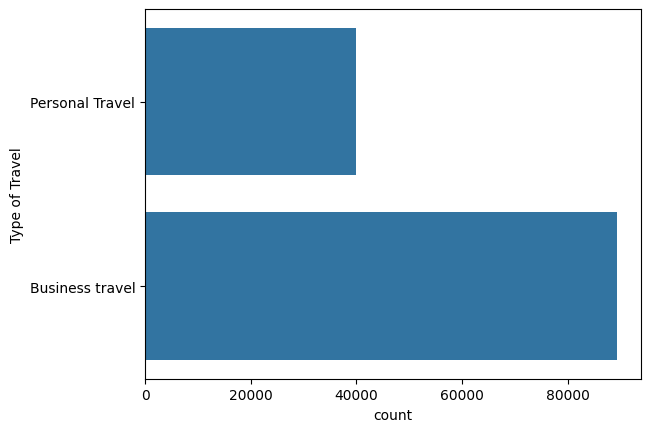

In [19]:
sns.countplot(df["Type of Travel"])

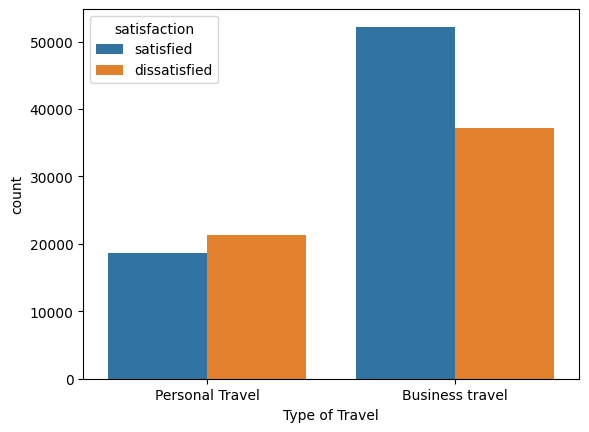

In [20]:
sns.countplot(df,x="Type of Travel",hue="satisfaction")
plt.show()


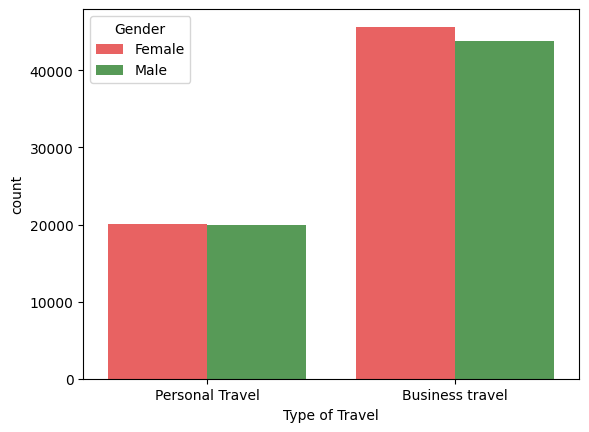

In [21]:
sns.countplot(df,x="Type of Travel",hue="Gender",palette={"Male":"Green","Female":"Red"},alpha=0.7)
plt.show()

### In "Type of Travel" , The preferance for Business Travel is more than the Personal Travel. According to type of travel,most of the customer are satisfied in Business Travel,and in Personal Travel dissatisfied Customer little more than satisfied.


# Customer Type

<Axes: xlabel='count', ylabel='Customer Type'>

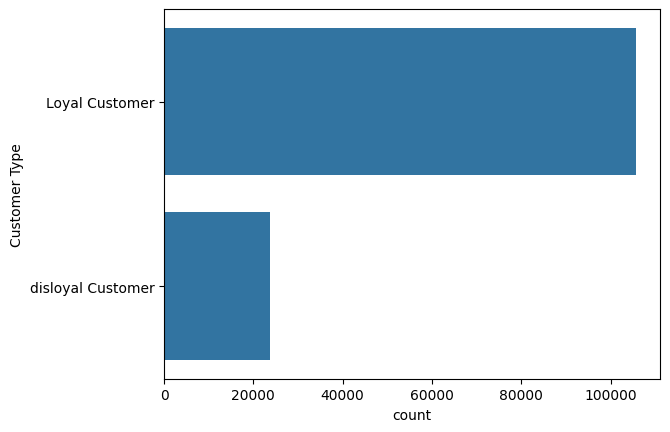

In [22]:
sns.countplot(df["Customer Type"])

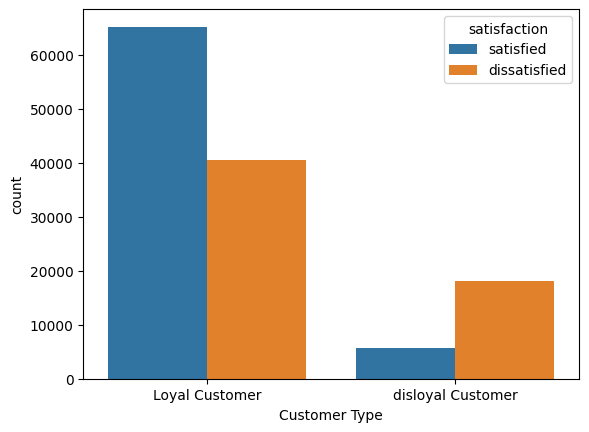

In [23]:
sns.countplot(df,x="Customer Type",hue="satisfaction")
plt.show()


### In above graph,Loyal Customer is more satisfied and disloyal customer are less satisfied.

# Class

<Axes: xlabel='count', ylabel='Class'>

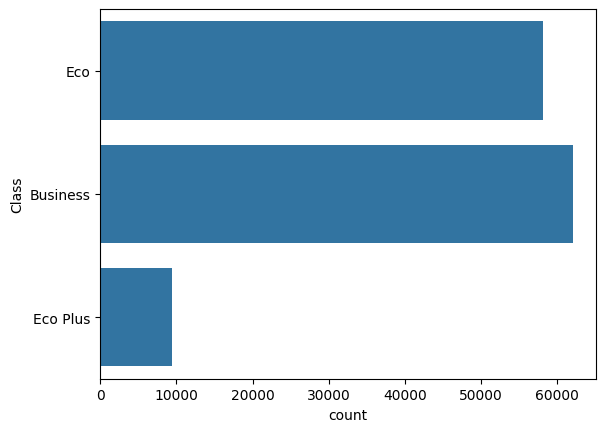

In [24]:
sns.countplot(df["Class"])

In [25]:
df["Class"].value_counts()

Class
Business    61990
Eco         58117
Eco Plus     9380
Name: count, dtype: int64

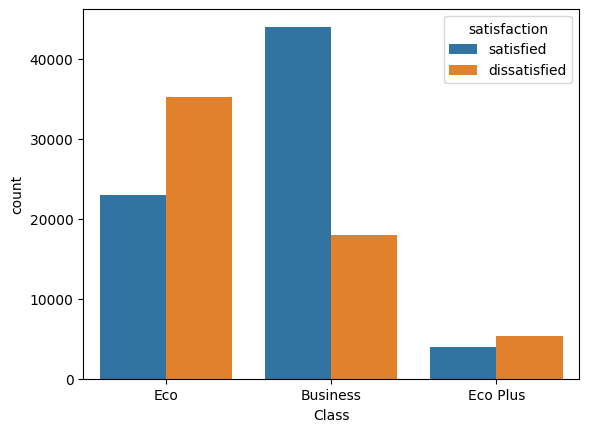

In [26]:
sns.countplot(df,x="Class",hue="satisfaction")
plt.show()


### Number of satisfied customer in Eco class is less than dissatisfied customer,number of satisfied customer in Business class is more and dissatisfied customer is very less.Number of satisfied customer in Eco Plus class is less than disstisfied customer.

# Flight Distance

In [27]:
df["Flight Distance"].value_counts()

Flight Distance
1963    92
1812    87
1639    87
1789    86
1981    85
        ..
5195     1
5624     1
5222     1
5426     1
4260     1
Name: count, Length: 5397, dtype: int64

<Axes: xlabel='Flight Distance', ylabel='Count'>

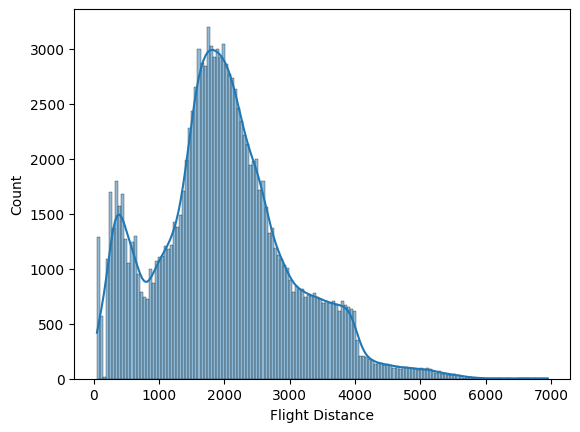

In [28]:
sns.histplot(df["Flight Distance"],kde=True)

<Axes: >

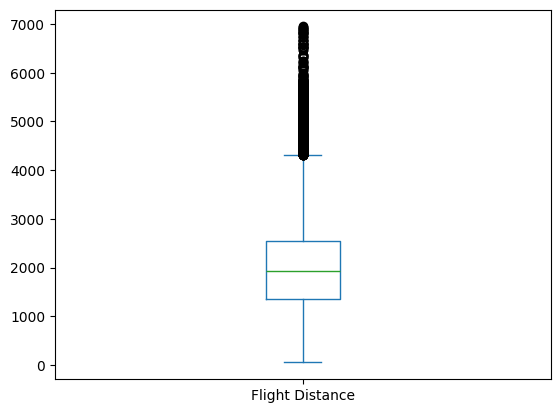

In [29]:
df["Flight Distance"].plot.box()

#### There is so many outliers in flight Distance.We can remove it.

In [30]:
df["Flight Distance"].quantile(0.977)

4203.0

In [31]:
new_df=df[df["Flight Distance"]<df["Flight Distance"].quantile(0.977)] # we Creaate new_df removing outlires

<Axes: >

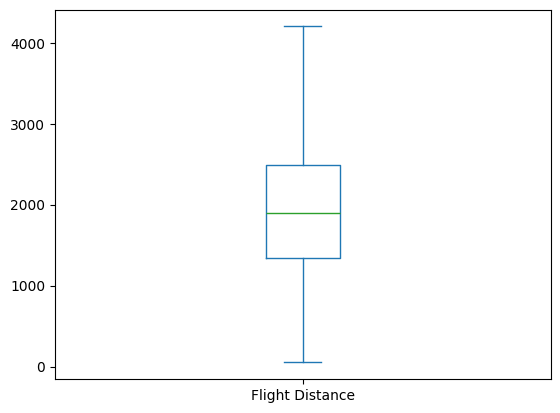

In [32]:
new_df["Flight Distance"].plot.box()

# Seat Comfort

In [33]:
df["Seat comfort"].value_counts()

Seat comfort
3    29096
2    28645
4    28315
1    20882
5    17768
0     4781
Name: count, dtype: int64

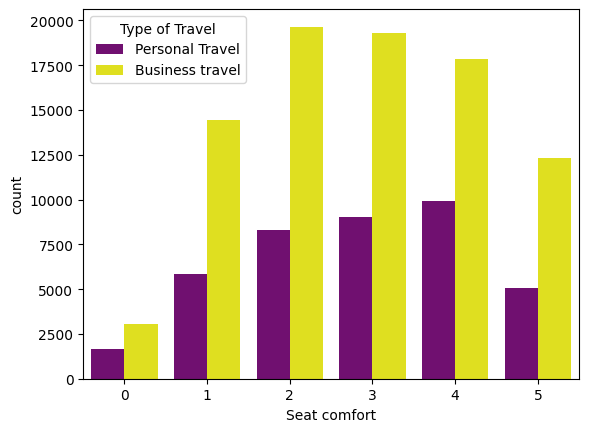

In [34]:
sns.countplot(new_df,x="Seat comfort",hue="Type of Travel",palette={"Personal Travel":"Purple","Business travel":"Yellow"})
plt.show()


### In every Seat comfort Coloumn there is more rating for Business Traval than personel Traval.

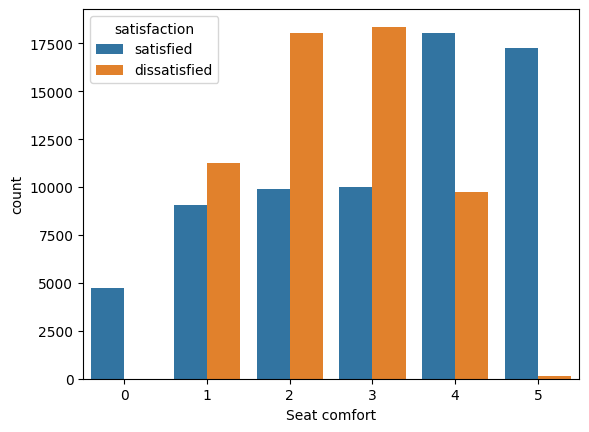

In [35]:
sns.countplot(new_df,x="Seat comfort",hue="satisfaction")
plt.show()


### Here, The number of customer who given rating '0','4'and '5' are satisfied and '1','2' and '3' rated more customers are dissatisfied than satisfied customer

# Departure/Arrival time convenient

In [36]:
new_df["Departure/Arrival time convenient"].value_counts()

Departure/Arrival time convenient
4    28900
5    26116
3    22533
2    22153
1    20213
0     6591
Name: count, dtype: int64

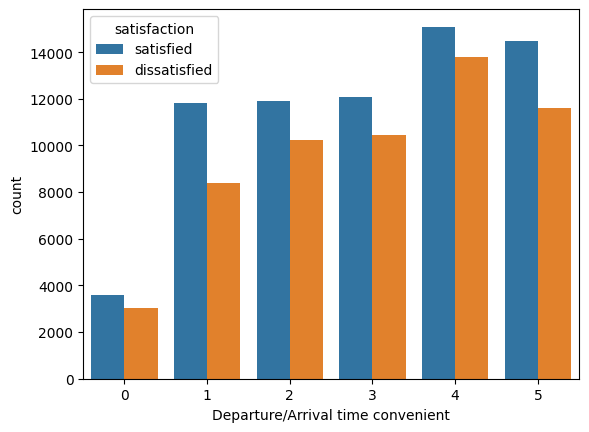

In [37]:
sns.countplot(new_df,x="Departure/Arrival time convenient",hue="satisfaction")
plt.show()


### According to "Departure/Arrival time convenient", In  all rating customers rating , Satisfied customer are more than dissatisfied customers.

# Food And Drink

In [38]:
new_df["Food and drink"].value_counts()

Food and drink
3    27482
4    26499
2    26478
1    20491
5    19708
0     5848
Name: count, dtype: int64

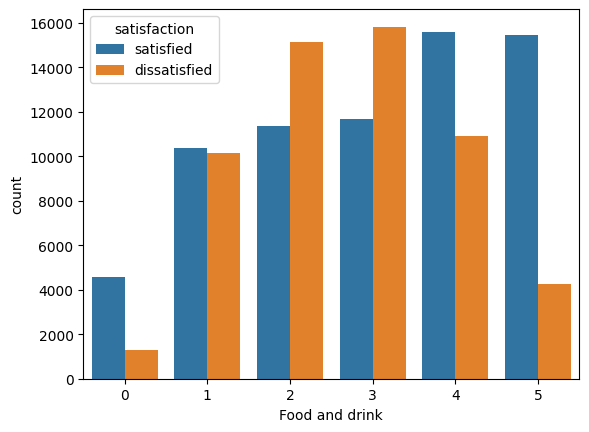

In [39]:
sns.countplot(new_df,x="Food and drink",hue="satisfaction")
plt.show()


### According to Food and drink, In '0','1','4' and '5' rating given by customers,the more customers are satisfied from food and drink.More customers given by rating '2' and '3'are dissatisfied.

# Gate location   

In [40]:
new_df["Gate location"].value_counts()

Gate location
3    32833
4    29354
2    23851
1    21937
5    18529
0        2
Name: count, dtype: int64

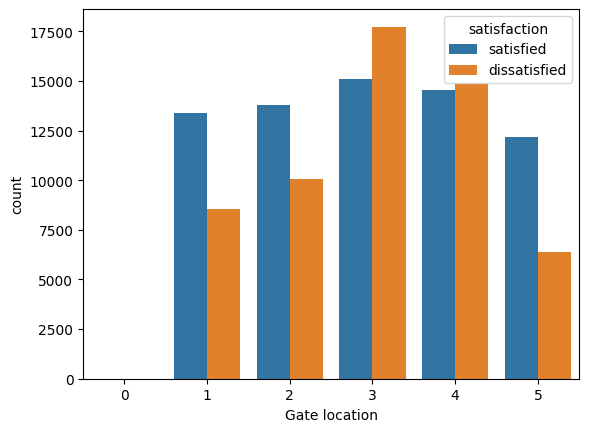

In [41]:
sns.countplot(new_df,x="Gate location",hue="satisfaction")
plt.show()


### The rating given by customer '1','2' and '5',more customers are satisfied from Gate location ,and rating givin'3' and '4' are more dissatisfied customer from Gate location

# Inflight wifi service  

In [42]:
new_df["Inflight wifi service"].value_counts()

Inflight wifi service
4    30477
5    27972
3    26976
2    26508
1    14454
0      119
Name: count, dtype: int64

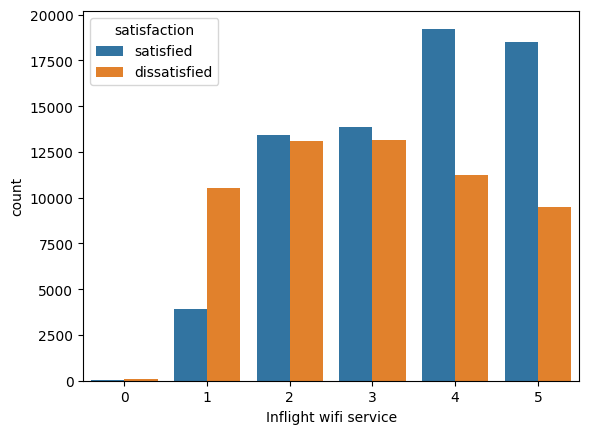

In [43]:
sns.countplot(new_df,x="Inflight wifi service",hue="satisfaction")
plt.show()


### '2','3','4' and '5' rating given by more customer for wifi service is  satisfied and the rating '1' given ,more customers are disatisfied from wifi services.

# Inflight entertainment  

In [44]:
new_df["Inflight entertainment"].value_counts()

Inflight entertainment
4    40710
5    28960
3    23632
2    18680
1    11569
0     2955
Name: count, dtype: int64

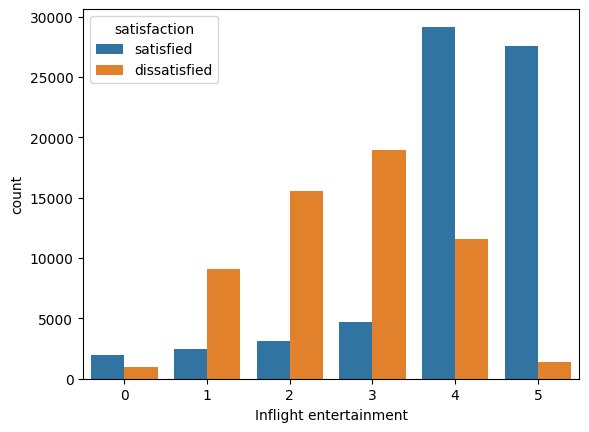

In [45]:
sns.countplot(new_df,x="Inflight entertainment",hue="satisfaction")
plt.show()

### Rating '0','4' and '5' given by more customers are satisfied than dissatisfied customer.the raing '1','2'and '3' given customeres are more dissatisfied than satisfied customer.

# Online support 

In [46]:
new_df["Online support"].value_counts()

Online support
4    40387
5    34663
3    21021
2    16755
1    13679
0        1
Name: count, dtype: int64

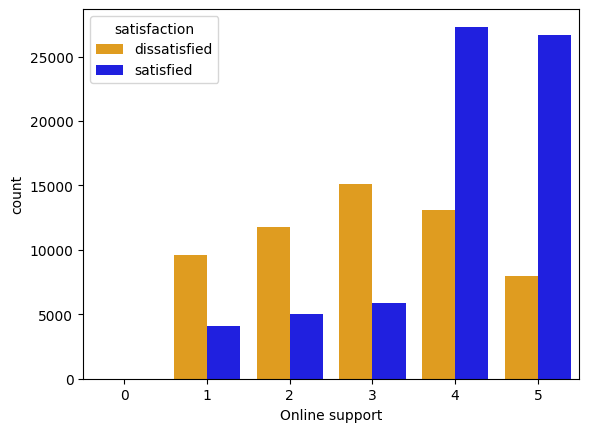

In [47]:
sns.countplot(new_df,x="Online support",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})
plt.show()

### According to online support, the rating '4' and '5' given more customers are  satisfied than dissatisfied People.and the rating'1','2' and '3' given more customers are dissatisfied than satisfied.

# Ease of Online booking    

In [48]:
new_df["Ease of Online booking"].value_counts()

Ease of Online booking
4    38831
5    33281
3    21761
2    19454
1    13164
0       15
Name: count, dtype: int64

<Axes: xlabel='Ease of Online booking', ylabel='count'>

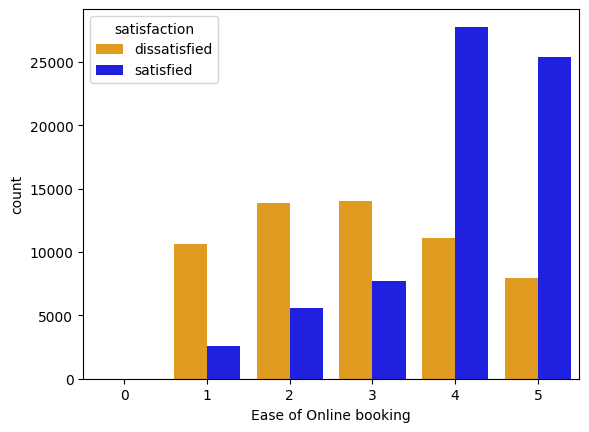

In [49]:
sns.countplot(new_df,x="Ease of Online booking",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})

# On-board service       

In [50]:
new_df["On-board service"].value_counts()       

On-board service
4    39774
5    31035
3    26180
2    16671
1    12844
0        2
Name: count, dtype: int64

<Axes: xlabel='On-board service', ylabel='count'>

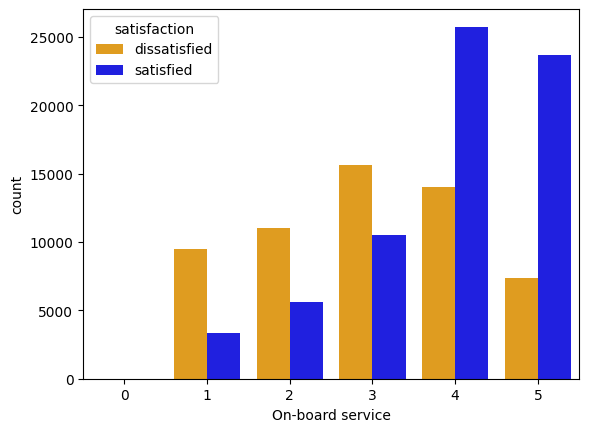

In [51]:
sns.countplot(new_df,x="On-board service",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})

### The no of satisfied customers is greater than the number of dissatisfied customers who gave '4' and'5'rating.and the no of dissatisfied customers are greater than the number of satisfied customer who gave the '1','2' and '3' rating.

# Leg room service    

In [52]:
new_df["Leg room service"].value_counts()

Leg room service
4    38789
5    33641
3    21739
2    21115
1    10780
0      442
Name: count, dtype: int64

<Axes: xlabel='Leg room service', ylabel='count'>

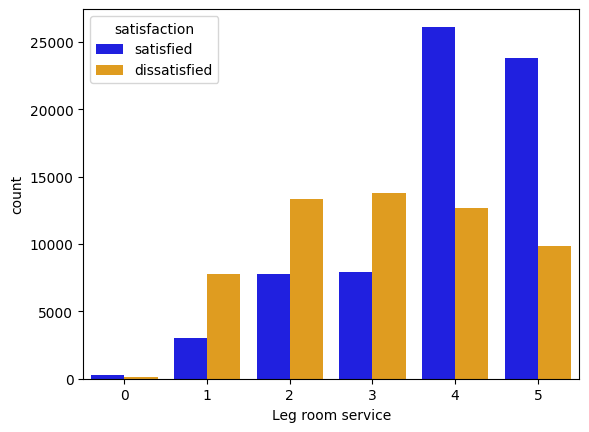

In [53]:
sns.countplot(new_df,x="Leg room service",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})

### The no of satisfied customers is greater than the number of dissatisfied customers who gave'0', '4' and'5'rating.and the no of dissatisfied customers are greater than the number of satisfied customer who gave the '1','2' and '3' rating ,according to leg room service.



# Baggage handling

In [54]:
new_df["Baggage handling"].value_counts()

Baggage handling
4    46967
5    34841
3    23802
2    13128
1     7768
Name: count, dtype: int64

<Axes: xlabel='Baggage handling', ylabel='count'>

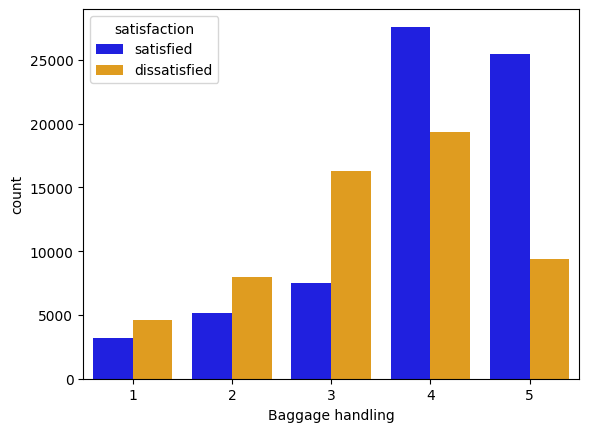

In [55]:
sns.countplot(new_df,x="Baggage handling",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})

### The no of satisfied customers is greater than the number of dissatisfied customers who gave '4' and'5'rating.and the no of dissatisfied customers are greater than the number of satisfied customer who gave the '1','2' and '3' rating ,according to Baggage handling.

# Checkin service

In [56]:
new_df["Checkin service"].value_counts()

Checkin service
4    35500
3    34688
5    26337
2    15042
1    14938
0        1
Name: count, dtype: int64

<Axes: xlabel='Checkin service', ylabel='count'>

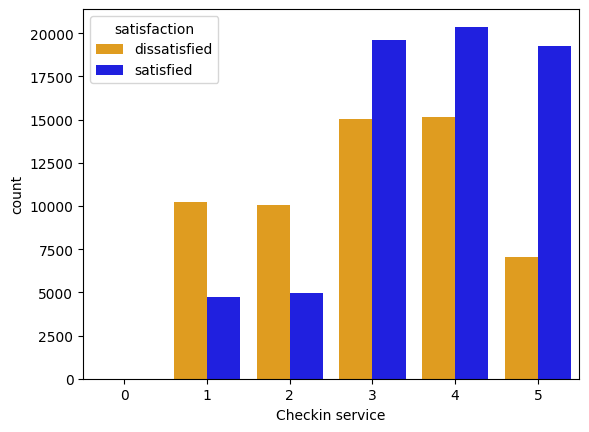

In [57]:
sns.countplot(new_df,x="Checkin service",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})

### In Checkin service,The no of satisfied customers is greater than the number of dissatisfied customers who gave'3', '4' and'5'rating.and the no of dissatisfied customers are greater than the number of satisfied customer who gave the '1'and'2'  rating.

# Cleanliness

In [58]:
new_df["Cleanliness"].value_counts()

Cleanliness
4    47618
5    35055
3    23239
2    13061
1     7531
0        2
Name: count, dtype: int64

<Axes: xlabel='Cleanliness', ylabel='count'>

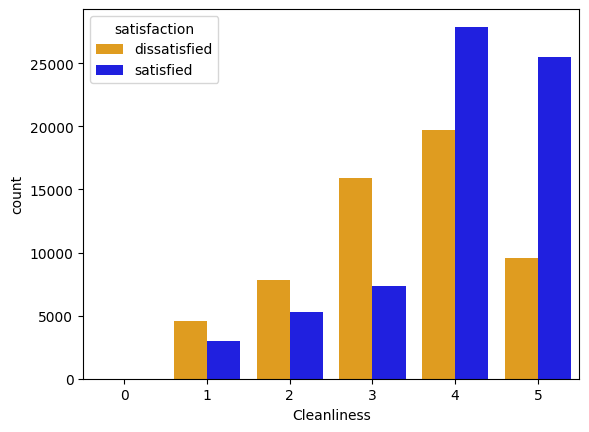

In [59]:
sns.countplot(new_df,x="Cleanliness",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})

### The no of satisfied customers is greater than the number of dissatisfied customers who gave''4' and'5'rating.and the no of dissatisfied customers are greater than the number of satisfied customer who gave the '1','2' and '3' rating ,according to Clesnliness.

# Online boarding

In [60]:
new_df["Online boarding"].value_counts()

Online boarding
4    34058
3    30166
5    29086
2    18085
1    15097
0       14
Name: count, dtype: int64

<Axes: xlabel='Online boarding', ylabel='count'>

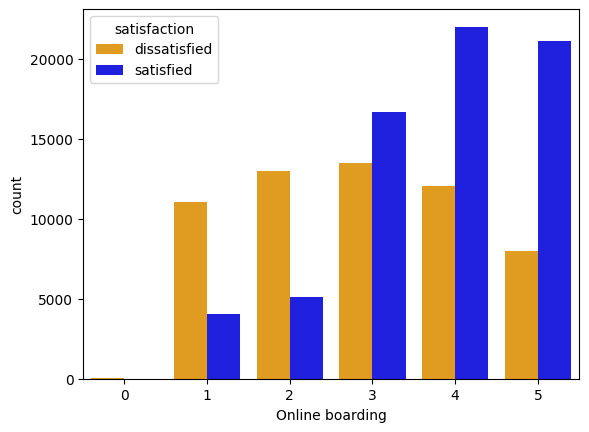

In [61]:
sns.countplot(new_df,x="Online boarding",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})

### The no of satisfied customers is greater than the number of dissatisfied customers who gave'3', '4' and'5'rating.and the no of dissatisfied customers are greater than the number of satisfied customer who gave the '1'and'2' rating ,according to Online boarding.

# Departure Delay in Minutes

In [62]:
new_df["Departure Delay in Minutes"]

0           0
1         310
2           0
3           0
4           0
         ... 
129874      5
129875      0
129876    174
129877    155
129878    193
Name: Departure Delay in Minutes, Length: 126506, dtype: int64

<Axes: >

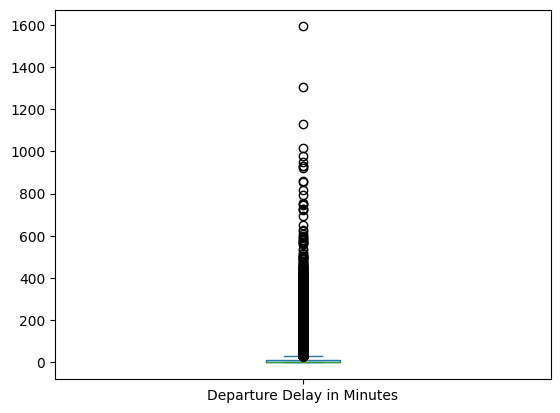

In [63]:
df["Departure Delay in Minutes"].plot.box()

<Axes: xlabel='Departure Delay in Minutes', ylabel='count'>

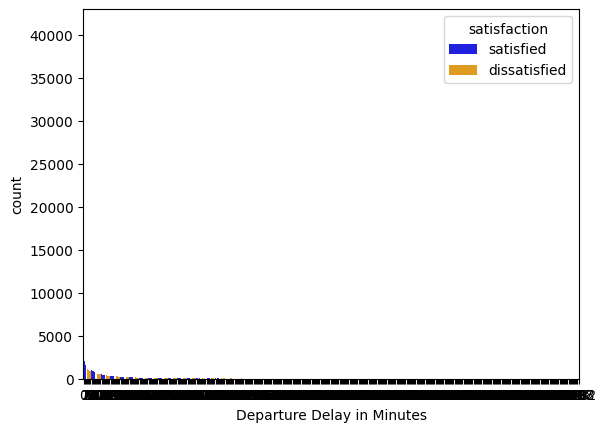

In [64]:
sns.countplot(new_df,x="Departure Delay in Minutes",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})

<Axes: xlabel='Arrival Delay in Minutes', ylabel='count'>

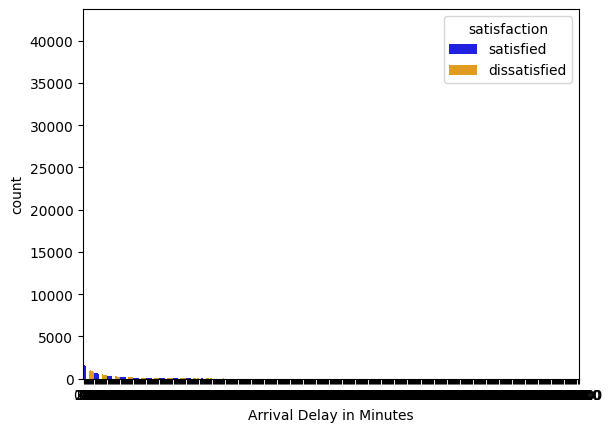

In [65]:
sns.countplot(new_df,x="Arrival Delay in Minutes",hue="satisfaction",palette={"satisfied":"blue","dissatisfied":"orange"})

In [66]:
new_df.drop(["Arrival Delay in Minutes","Departure Delay in Minutes"],axis=1,inplace=True)

In [67]:
new_df.head()

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,4,2,3,3,0,3,5,3,2
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,0,2,2,3,4,4,4,2,3,2
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,0,2,2,3,3,4,4,4,2
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,4,3,1,1,0,1,4,1,3
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,3,4,2,2,0,2,4,2,5


In [68]:
People_Satisfaction=list(map(lambda x:0 if x == "satisfied" else 1,new_df["satisfaction"]))

In [69]:
new_df["satisfaction"]=People_Satisfaction

In [70]:
People_Gender=list(map(lambda x:0 if x == "Female" else 1,new_df["Gender"]))

In [71]:
new_df["Gender"]=People_Gender

In [72]:
People_Type=list(map(lambda x:0 if x == "Loyal Customer" else 1,new_df["Customer Type"]))

In [73]:
new_df["Customer Type"]=People_Type

In [74]:
Travel_Type=list(map(lambda x:0 if x == "Personal Travel" else 1,new_df["Type of Travel"]))

In [75]:
new_df["Type of Travel"]=Travel_Type

In [76]:
a="Eco Plus"
new_df["Class"]=new_df['Class'].replace(a,2)

In [77]:
b="Eco"
new_df["Class"]=new_df['Class'].replace(b,0)

In [78]:
c="Business"
new_df["Class"]=new_df['Class'].replace(c,1)

In [79]:
new_df["Class"].value_counts()

Class
1    59273
0    57899
2     9334
Name: count, dtype: int64

# Logistic Regression

In [80]:
X=new_df.drop("satisfaction",axis=1)

In [81]:
y=new_df["satisfaction"]

In [82]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding
0,0,0,65,0,0,265,0,0,0,2,2,4,2,3,3,0,3,5,3,2
1,1,0,47,0,1,2464,0,0,0,3,0,2,2,3,4,4,4,2,3,2
2,0,0,15,0,0,2138,0,0,0,3,2,0,2,2,3,3,4,4,4,2
3,0,0,60,0,0,623,0,0,0,3,3,4,3,1,1,0,1,4,1,3
4,0,0,70,0,0,354,0,0,0,3,4,3,4,2,2,0,2,4,2,5


In [83]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: satisfaction, dtype: int64

In [84]:
from sklearn.model_selection import train_test_split

In [85]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=56)

In [86]:
X_train.shape

(94879, 20)

In [87]:
X_test.shape

(31627, 20)

In [88]:
model = LogisticRegression()

In [89]:
model.fit(X_train,y_train)

LogisticRegression()

In [90]:
model.score(X_train,y_train)

0.7948018001876074

In [91]:
y_pred = model.predict(X_test)

In [92]:
accuracy_score(y_test,y_pred)

0.7929617099313877

In [93]:
from sklearn.metrics import confusion_matrix,classification_report

In [94]:
confusion_matrix(y_test, y_pred)

array([[14638,  2719],
       [ 3829, 10441]], dtype=int64)

### The number of True Positive = 14638.

### The number of False Negative(Type 2 Error) = 2719.

### The number of False Positive(Type 1 Error) = 3829.

### The number of True Negative = 10441.

* here,from confusion matrix we conclude type 2 error.

In [95]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82     17357
           1       0.79      0.73      0.76     14270

    accuracy                           0.79     31627
   macro avg       0.79      0.79      0.79     31627
weighted avg       0.79      0.79      0.79     31627



In [96]:
from sklearn.metrics import roc_auc_score,roc_curve

In [97]:
y_pred_prob = model.predict_proba(X_test)

In [98]:
fpr , tpr,threshold =roc_curve(y_test,y_pred_prob[:,1])

In [99]:
auc_score = roc_auc_score(y_test,y_pred_prob[:,1])
auc_score

0.8661529537650717

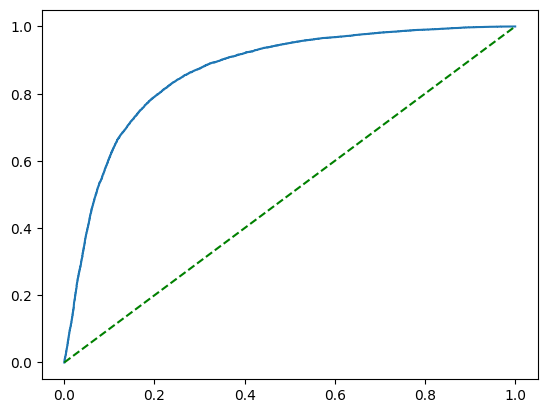

In [100]:
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"g--")